# Brief introduction to TCGA TARGET GTEx (TTG)

TCGA TARGET GTEx dataset comes from the UCSC RNA-seq Compendium. TCGA and TARGET contain **RNASeq** measurements of a **large number of human tumors**. GTEx contains **RNASeq** measurements of a **large number of normal human tissues**.

The UCSC RNA-seq Compendium has aligned the data to the hg38 genome and re-analysed them with the same protocol to avoid batch effects. 

[Website describing the TTG dataset](https://xenabrowser.net/datapages/?hub=https://toil.xenahubs.net:443)

### Citation

When using any data from TCGA, acknowledge the TCGA Research Network in the acknowledgements section of your work. E.g. "The results published or shown here are in whole or part based upon data generated by the TCGA Research Network: https://www.cancer.gov/tcga."

When using this dataset, cite the Nature Biotechnology publication: https://doi.org/10.1038/nbt.3772

To support the Xena platform where the data are accessible, cite:

Goldman, M.J., Craft, B., Hastie, M. et al. Visualizing and interpreting cancer genomics data via the Xena platform. Nat Biotechnol (2020). https://doi.org/10.1038/s41587-020-0546-8.

# Librairies

In [1]:
import os
import sys
code_path = os.path.split(os.path.split(os.getcwd())[0])[0]
sys.path.append(code_path)

import json
from setting import *
from download_data import *
from dataset import *
from plots_and_stats import *
from utils import *

set_pyplot()

/projects/GraphNEx/anaconda3/envs/GraphNEx/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Path

In [2]:
name = 'ttg-breast'  # ttg-all, ttg-breast
save_path = get_save_path(name, code_path)
data_path = get_data_path(name)

# Dataset

### Format the dataset

In [3]:
database = 'ttg'
label_name = '_sample_type'
assert label_name in get_possible_classes(database, name), f"The class has to be chosen within this list {get_possible_classes(database, name)}."

In [4]:
data = TCGA_dataset(data_path, database, name, label_name)

41762 weakly expressed genes are removed of the dataset.


### Describe the dataset

In [5]:
describe_dataset(data)

The dataset contains 2 classes. Here are the classes and their respective number of samples:
	Normal: 292
	Tumor: 1092
In total, there are 1384 samples, each of them containing 14373 features.


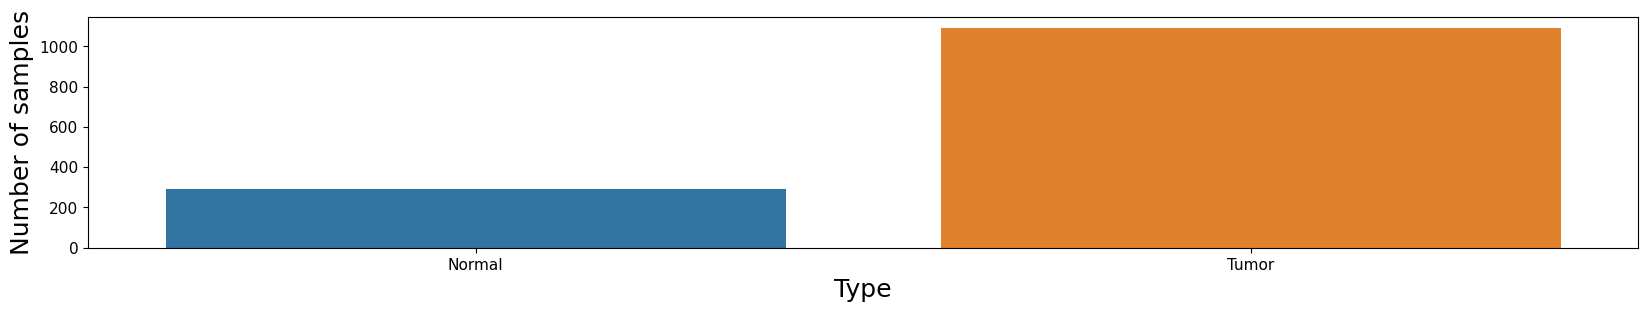

In [6]:
create_new_folder(save_path)
plot_class_imbalance(data, label_name, save_path)

In [7]:
# Each gene is represented by an expression such as 'TCOF1'.

# Code to find the index of a gene from its name.
# np.argwhere(np.array(data.genes_IDs) == 'TCOF1')

### Save the names of the genes to reuse them later

In [8]:
# json.dump(data.genes_IDs, open(os.path.join(save_path, "genesIds.txt"),'w'))
# genes_IDs = json.load(open(os.path.join(save_path, "genesIds.txt"))